In [1]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
from remi_module.remi_module_import import *
import matplotlib.pyplot as plt


AUDIO_NOISE_PATH = "audio/audio_noise/"
NOISE_PATH = "audio/noise/"
AUDIO_PATH = "audio/audio/"
RESULTS_PATH = "results/"

def power(signal):
    return sum([pow(s, 2.0) for s in signal]) / len(signal)

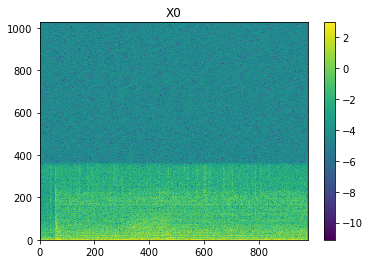

SNR = 18.23325070740725


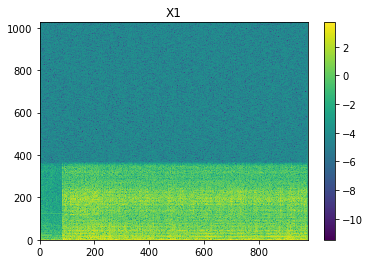

SNR = -10.218118440992141


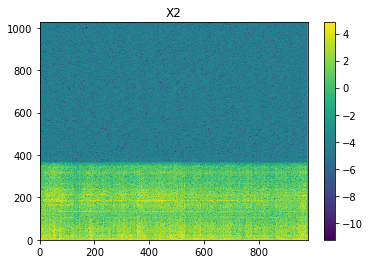

SNR = -34.01079686419417


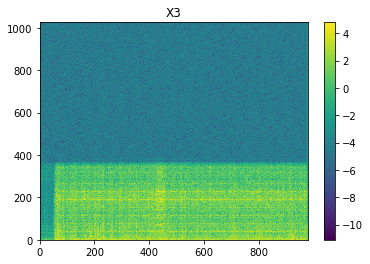

SNR = -28.552522726118262


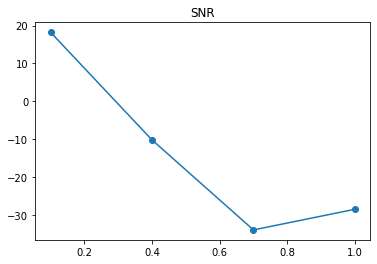

In [10]:
files_n = [
    "husky_noise_1_speed1_chan_4.wav",
    "husky_noise_1_speed2_chan_4.wav",
    "husky_noise_1_speed3_chan_4.wav",
    "husky_noise_1_speed4_chan_4.wav"
]

file_a = "Kihara_1_back_chan_0.wav"
nperseg = 2048

(fs, signal_a) = scipy.io.wavfile.read(AUDIO_PATH + file_a)

SNRs = []
signals_n = []

for i, file_n in enumerate(files_n):
    (_, signal_n) = scipy.io.wavfile.read(NOISE_PATH + file_n)
    signals_n.append(signal_n)
    
    SNRs.append(np.log(power(signal_a) / power(signal_n)) * 10)
    _, _, Zxx_n = scipy.signal.stft(signal_n, fs, nperseg=nperseg)

    plt.figure()
    plt.title("X" + str(i))
    plt.pcolormesh(np.log(abs(Zxx_n)))
    plt.colorbar()
    plt.show()
    
    
    
    print("SNR =", SNRs[-1])

plt.figure()
plt.title("SNR")
plt.plot([0.1, 0.4, 0.7, 1.0], SNRs, "-o")